In [1]:
import numpy as np

In [2]:
class PocketPerceptron:
    def __init__(self, x, y, max_iter, lr=1):
        self.x = x
        self.y = y
        self.w = np.zeros((x.shape[1]))
        self.max_iter = max_iter
        self.lr = 0.01
        self.current_iter = 1
        self.best_w = self.w
        self.best_error = np.Inf

    def predict(self, x):
        predictions = np.dot(x, self.w)
        
        predictions[predictions > 0] = 1
        predictions[predictions < 0] = -1 
        
        return predictions
    
    def _update_weights(self, x_n, y_n):
        self.w = self.w + self.lr * y_n * x_n
        
    def _calculate_error(self,  predictions):
        error = np.sum(predictions != self.y)
        return error
        
    def train(self):
        while self.current_iter < self.max_iter: # Check if reached max iterations
            predictions = self.predict(self.x)
            self.current_error = self._calculate_error(predictions)
            if self.current_error < self.best_error:
                self.best_error = self.current_error
                self.best_w = self.w
            if self.current_error == 0:
                break
            for i, row in enumerate(predictions): # Find a misclassified example
                if predictions[i] != self.y[i]:
                    self._update_weights(self.x[i], self.y[i])
                    break # Stop once a misclassified example is found
            self.current_iter +=1

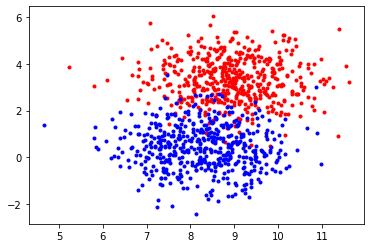

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
# samples = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1, random_state=777)
samples = make_blobs(n_samples=1000, centers=2, n_features=2, center_box=(0, 10), random_state=6)
red = samples[0][samples[1] == 0]
blue = samples[0][samples[1] == 1]
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [4]:
x = samples

In [5]:
x = samples[0]
ones = np.ones((x.shape[0], 1))
x = np.concatenate((x, ones), axis=1)
y = samples[1]
y[y == 0] = -1

In [6]:
pp = PocketPerceptron(x, y, 5000)
pp.train()

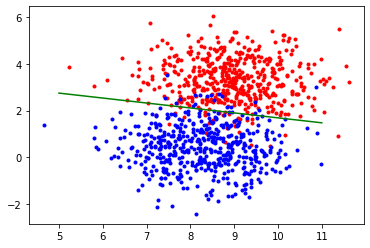

In [7]:
weights = pp.best_w
z = np.linspace(5, 11)
line = -1 * weights[0]/weights[1] * z - weights[2]/weights[1]
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(z, line, "g")
plt.show()